In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol and date range
ticker = "AAPL"
end_date = datetime.today()
start_date = end_date - timedelta(days=30)

# Fetch the data
apple_data = yf.download(ticker, start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

# Display the data
print(apple_data)


In [ ]:
ticker = "AAPL"
interval = "1m"  # Smallest interval

# Fetch data for the last 7 days
apple_data = yf.download(tickers=ticker, period="7d", interval=interval)

# Display the first few rows of data
print(apple_data.head())

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fetch Apple's 1-minute data over 7 days
ticker = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG", "META", "TSLA", "AVGO", "BRK-B", "WMT"]
interval = "1m"
period = "1d"

def predict_stock(ticker):
    data = yf.download(tickers=ticker, period=period, interval=interval)

    # Extract closing prices
    closing_prices = data["Close"].dropna()

    train = closing_prices[:-26]  
    test = closing_prices[-26:]

    # Fit the ARIMA model
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()

    # Forecast for the 7th day
    forecast = model_fit.forecast(steps=len(test))

    # Plot the results
    plt.figure(figsize=(14, 6))
    plt.plot(closing_prices.index, closing_prices, label="Actual Data (Last 2 Days)")
    plt.plot(test.index, forecast, label="Predicted Data (7th Day)", linestyle='--')
    plt.title(f"{ticker} Stock Price: Actual vs Predicted (ARIMA)")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

plots = [predict_stock(tick) for tick in ticker]

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Ticker details
tickers = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG", "META", "TSLA", "AVGO", "BRK-B", "WMT"]
interval = "1m"
period = "1d"

results = []  # Store results for each ticker

def predict_future(model, last_data_point, scaler, n_predictions=10):
    # Use the last data point to start predicting the future
    predictions = []
    current_input = last_data_point

    for _ in range(n_predictions):
        
        # Predict the next value
        next_prediction = model.predict(np.array(current_input[-1]).reshape(-1, 1))
        predictions.append(next_prediction[0])
        
        # Update current input by appending the predicted value
        current_input = np.append(current_input[1:], next_prediction)
    
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

def plot_future_predictions(predictions, data, future_periods=10):
    # Create future dates (Assuming the last date is continuous)
    last_date = data.index[-1]
    future_dates = [last_date + np.timedelta64(i, 'm') for i in range(1, future_periods + 1)]
    
    # Plot the future predictions
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data["Close"], label="Actual Data")
    plt.plot(future_dates, predictions, label="Future Predictions", linestyle="--", color="red")
    plt.title("Stock Price: Actual vs Future Predictions")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

def predict_stock(ticker):
    # Download stock data
    data = yf.download(tickers=ticker, period=period, interval=interval)

    # Extract and clean the closing prices
    closing_prices = data["Close"].dropna().values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    # Prepare training and testing data
    train_size = len(scaled_prices) - 10
    train, test = scaled_prices[:train_size], scaled_prices[train_size:]

    # Create input-output datasets
    def create_dataset(data):
        x, y = [], []
        for i in range(len(data) - 1):
            x.append(data[i][0])
            y.append(data[i + 1][0])
        return np.array(x), np.array(y)

    X_train, y_train = create_dataset(train)
    # X_test, y_test = create_dataset(test, time_step)
    X_train = np.array(X_train).reshape(-1, 1)
    print(X_train.shape)
    
    # Build the MLPRegressor model
    model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    predictions = predict_future(model, X_train, scaler, 10)
    plot_future_predictions(predictions, data, 10)

    # Make predictions
    # predictions = model.predict(X_test)
    # predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    # Inverse transform actual test data
    # y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Record key values
    # last_train_price = closing_prices[train_size - 1][0]
    # last_predicted_price = predictions[-1][0]
    # last_actual_price = y_test_actual[-1][0]

    # results.append({
    #     "Ticker": ticker,
    #     "Last Train Price": last_train_price,
    #     "Predicted Price": last_predicted_price,
    #     "Actual Price": last_actual_price
    # })

    # Plot the results
    # plt.figure(figsize=(14, 6))
    # plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Actual Data")
    # plt.plot(data.index[-len(predictions):], predictions, label="Predicted Data", linestyle="--")
    # plt.title(f"{ticker} Stock Price: Actual vs Predicted (MLPRegressor)")
    # plt.xlabel("Time")
    # plt.ylabel("Price (USD)")
    # plt.legend()
    # plt.show()

# Generate plots and record results for each ticker
for tick in tickers:
    predict_stock(tick)

# Display results
# for result in results:
#     print(result)


In [ ]:
['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'V', 'PFE', 'KO', 'JNJ', 'DIS', 'BA', 'CAT', 'WMT', 'MCD', 'GE', 'CSCO', 'XOM', 'CVX', 'NKE', 'NFLX', 'UNH', 'PYPL', 'AMD', 'BA', 'IBM', 'INTC', 'GS', 'SPGI', 'T', 'VZ', 'AMGN', 'CVS', 'LMT', 'RTX', 'HD', 'LOW', 'UPS', 'MS', 'BK', 'AXP', 'BLK', 'MO', 'NEE', 'BMY', 'WFC', 'CSX', 'SCHW', 'ZTS', 'MTB', 'PGR', 'DHR', 'TMO', 'ABT', 'SYY', 'SYK', 'HUM', 'MRK', 'GILD', 'MMM', 'USB', 'MTCH', 'AIG', 'UAL']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers, get_fin_data
from models.lstm.lstm import get_train_test_for_lstm, build_model, predict_future

# Ticker details
tickers = get_s_p_tickers()
interval = "5m"
period = "1d"
start = (datetime.today() - timedelta(days=4)).strftime('%Y-%m-%d')
end = (datetime.today() - timedelta(days=3)).strftime('%Y-%m-%d')

results = []  # Store results for each ticker

def calc_difference(past, future):
    dif = future-past
    return dif
    if dif<0:
        return dif
    return f"+{dif}"

def predict_stock(ticker):
    # Get stock data
    closing_prices = get_fin_data(ticker, start, end, interval)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    X_train, y_train = get_train_test_for_lstm(scaled_prices)
    
    # Build the MLPRegressor model
    model = build_model(X_train, y_train)
    
    predictions = predict_future(model, y_train, scaler) # change y_tain to whole data set when real data

    # Record key values
    last_train_price = scaler.inverse_transform(np.array(X_train[-1][0]).reshape(-1, 1))[0][0]
    last_predicted_price = predictions[-1][0]
    last_actual_price = scaler.inverse_transform(np.array(scaled_prices[-1][0]).reshape(-1, 1))[0][0]

    results.append({
        "Ticker": ticker,
        # "Last Train Price": last_train_price,
        # "Predicted Price": last_predicted_price,
        # "Actual Price": last_actual_price,
        "Predicted Difference": calc_difference(last_train_price, last_predicted_price),
        "Actual Difference": calc_difference(last_train_price, last_actual_price)

    })

# Generate plots and record results for each ticker
for tick in tickers:
    predict_stock(tick)

# Create DataFrame
df = pd.DataFrame(results)

# Round to 2 decimal places
# df["Last Train Price"] = df["Last Train Price"].round(2)
# df["Predicted Price"] = df["Predicted Price"].round(2)
# df["Actual Price"] = df["Actual Price"].round(2)

# Display the table
print(df)


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Predicted Difference'], df['Actual Difference'], marker='o', linestyle='-', color='blue')
plt.title('Pred vs Act Plot')
plt.xlabel('Pred Axis')
plt.ylabel('Act Axis')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Plot each pair of values from both columns for the same x-axis index
for i in range(len(df)):
    plt.scatter(i + 1, df['Predicted Difference'][i], color='blue')  # Plot for Column1
    plt.scatter(i + 1, df['Actual Difference'][i], color='red')   # Plot for Column2

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Column1 and Column2 at Each Index')
plt.show()

In [ ]:
def predict_future(model, last_data_point, scaler, n_predictions=1):
    # Use the last data point to start predicting the future
    predictions = []
    current_input = last_data_point

    for _ in range(n_predictions):
        
        # Predict the next value
        next_prediction = model.predict(np.array(current_input[-1]).reshape(-1, 1))
        predictions.append(next_prediction[0])
        
        # Update current input by appending the predicted value
        current_input = np.append(current_input[1:], next_prediction)
    
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

def plot_future_predictions(predictions, data, future_periods=1):
    # Create future dates (Assuming the last date is continuous)
    last_date = data.index[-1]
    future_dates = [last_date + np.timedelta64(i, 'm') for i in range(1, future_periods + 1)]
    
    # Plot the future predictions
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data["Close"], label="Actual Data")
    plt.plot(future_dates, predictions, label="Future Predictions", linestyle="--", color="red")
    plt.title("Stock Price: Actual vs Future Predictions")
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

In [ ]:

# Initialize counters
both_above_0 = 0
both_below_0 = 0
one_above_one_below = 0

# Loop through each row and count the conditions
for i in range(len(df)):
    col1 = df['Predicted Difference'][i]
    col2 = df['Actual Difference'][i]

    if col1 > 0 and col2 > 0:
        both_above_0 += 1
    elif col1 < 0 and col2 < 0:
        both_below_0 += 1
    elif (col1 > 0 and col2 < 0) or (col1 < 0 and col2 > 0):
        one_above_one_below += 1

# Print the results
print(f"Both dots are above 0: {both_above_0} times")
print(f"Both dots are below 0: {both_below_0} times")
print(f"One dot is above 0 while the other is below 0: {one_above_one_below} times")

In [ ]:
14+9+42

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers, get_fin_data
from models.lstm.lstm import get_train_test_for_lstm

# Ticker details
tickers = get_s_p_tickers()
interval = "5m"
period = "1d"
start = (datetime.today() - timedelta(days=4)).strftime('%Y-%m-%d')
end = (datetime.today() - timedelta(days=3)).strftime('%Y-%m-%d')

closing_prices = get_fin_data("aapl", start, end, interval)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

print(scaled_prices)
train_size = len(scaled_prices) - 1
train = scaled_prices[:train_size]

In [ ]:
np.array(data).reshape(-1,1)

In [ ]:
data = [0,1,2,3,4,5,6,7,8,9,10]
def create_dataset(data):
    x, y = [], []
    for i in range(len(data) - 1):
        x.append(data[i][0])
        y.append(data[i + 1][0])
    return np.array(x), np.array(y)
x, y = create_dataset(np.array(data).reshape(-1,1))
print(x)
print(y)

In [ ]:
data[:-1]

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers, get_fin_data
from models.lstm.lstm import get_train_test_for_lstm, build_model, predict_future
from core_code.testing import calc_difference, plot_skatter

# Ticker details
tickers = get_s_p_tickers()

def predict_stock(ticker, start, end, interval):
    # Get stock data
    closing_prices = get_fin_data(ticker, start, end, interval)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    X_train, y_train = get_train_test_for_lstm(scaled_prices)
    
    # Build the MLPRegressor model
    model = build_model(X_train, y_train.ravel())
    
    predictions = predict_future(model, y_train, scaler) # change y_tain to whole data set when real data

    # Record key values
    last_train_price = scaler.inverse_transform(np.array(X_train[-1][0]).reshape(-1, 1))[0][0]
    last_predicted_price = predictions[-1][0]
    last_actual_price = scaler.inverse_transform(np.array(scaled_prices[-1][0]).reshape(-1, 1))[0][0]
    return last_train_price, last_predicted_price, last_actual_price

ave_act_dif = []
profits_005 = []
profits_01 = []
profits_015 = []
for i in range(30):
    results = []
    act_dif = []
    interval = "5m"
    start = (datetime.today() - timedelta(days=i+1)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')

    try:
        # Generate plots and record results for each ticker
        for ticker in tickers:
            last_train_price, last_predicted_price, last_actual_price = predict_stock(ticker, start, end, interval)

            predicted_difference = calc_difference(last_train_price, last_predicted_price)
            actual_difference = calc_difference(last_train_price, last_actual_price)
            act_dif.append(actual_difference)

            if predicted_difference>0.005:
                print(i, last_train_price, last_predicted_price, last_actual_price)

                profits_005.append((i, last_train_price, last_predicted_price, last_actual_price))

                if predicted_difference>0.01:
                    print(i, last_train_price, last_predicted_price, last_actual_price)

                    profits_01.append((i, last_train_price, last_predicted_price, last_actual_price))

                    if predicted_difference>0.015:
                        print(i, last_train_price, last_predicted_price, last_actual_price)

                        profits_015.append((i, last_train_price, last_predicted_price, last_actual_price))

            results.append({
                "Ticker": ticker,
                "Predicted Difference": predicted_difference,
                "Actual Difference": actual_difference

            })
        # Create DataFrame
        df = pd.DataFrame(results)
        plot_skatter(df)

    except Exception as e:
        print(e)
    if len(act_dif)>0:
        ave_act_dif.append((i, sum(act_dif)/len(act_dif)))

In [ ]:
print(ave_act_dif)
print(profits_1)
print(profits_2_5)
print(profits_5)

In [ ]:
print(ave_act_dif)
print(profits_1)
print(profits_2_5)
print(profits_5)

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers
from core_code.testing import calc_difference, plot_skatter, breached_threshold
from core_code.prediction import predict_stock

# Ticker details
tickers = get_s_p_tickers()

ave_act_dif = []
profits_005 = []
profits_01 = []
profits_015 = []
for i in range(3):
    results = []
    act_dif = []
    interval = "5m"
    start = (datetime.today() - timedelta(days=i+1)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')

    try:
        # Generate plots and record results for each ticker
        for ticker in tickers:
            last_train_price, last_predicted_price, last_actual_price = predict_stock(ticker, start, end, interval)

            predicted_difference = calc_difference(last_train_price, last_predicted_price)
            actual_difference = calc_difference(last_train_price, last_actual_price)
            act_dif.append(actual_difference)

            breached_threshold(0.005, profits_005, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.01, profits_01, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.015, profits_015, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)

            results.append({
                "Ticker": ticker,
                "Predicted Difference": predicted_difference,
                "Actual Difference": actual_difference
            })

        df = pd.DataFrame(results)
        plot_skatter(df)

    except Exception as e:
        print(e)
    if len(act_dif)>0:
        ave_act_dif.append((i, sum(act_dif)/len(act_dif)))

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers
from core_code.testing import calc_difference, plot_skatter, breached_threshold
from core_code.prediction import predict_stock
from core_code.get_fin_info import get_fin_data

# Ticker details
tickers = get_s_p_tickers()

ave_act_dif = {}
profits_005 = {}
profits_0075 = {}
profits_01 = {}
profits_015 = {}
profits_02 = {}
profits_025 = {}
for i in range(10):
    results = []
    act_dif = []
    interval = "5m"
    start = (datetime.today() - timedelta(days=i+1)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')

    try:
        # Generate plots and record results for each ticker
        for ticker in tickers:
            # Get stock data
            closing_prices = get_fin_data(ticker, start, end, interval)
            last_train_price, last_predicted_price, last_actual_price = predict_stock(closing_prices)

            predicted_difference = calc_difference(last_train_price, last_predicted_price)
            actual_difference = calc_difference(last_train_price, last_actual_price)
            act_dif.append(actual_difference)

            breached_threshold(0.005, profits_005, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.0075, profits_0075, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.01, profits_01, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.015, profits_015, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.02, profits_02, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)
            breached_threshold(0.025, profits_025, predicted_difference, i, last_train_price, last_predicted_price, last_actual_price)

            results.append({
                "Ticker": ticker,
                "Predicted Difference": predicted_difference,
                "Actual Difference": actual_difference
            })

        # df = pd.DataFrame(results)
        # plot_skatter(df)

    except Exception as e:
        print(e)
    if len(act_dif)>0:
        ave_act_dif[i] = sum(act_dif)/len(act_dif)

In [ ]:
print(ave_act_dif)
print(profits_005)
print(profits_01)
print(profits_015)

In [ ]:
import numpy as np
dicts = [profits_005, profits_0075, profits_01, profits_015, profits_02, profits_025]
for dic in dicts:
    averages = {key: np.mean(values) for key, values in dic.items()}

    for key, avg in averages.items():
        print(f"Key {key}: S&P_Ave = {ave_act_dif[key]}, Average = {avg}")

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect("data.db")
cursor = conn.cursor()

df = pd.read_sql("SELECT * FROM stocks_data", conn)
conn.close()  # Close connection

def convert_blob(blob):
    return np.frombuffer(blob, dtype=np.float64)  # Adjust dtype if needed

# Apply conversion to all rows
df = df.map(convert_blob)

# Convert DataFrame rows into a list of lists
list_of_lists = df.values.tolist()  # Extracts all rows as lists

# Plot each sublist sequentially
plt.figure(figsize=(10, 5))

colors = ['b', 'g', 'r', 'c', 'm']  # Different colors for each sublist
for i, sublist in enumerate(list_of_lists[:5]):  # Only 5 sublists
    plt.plot(range(len(sublist)), sublist, color=colors[i % len(colors)], label=f"Sublist {i+1}")

    # Plot styling
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Sequential Plot of 5 Sublists")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers
from core_code.testing import calc_difference, plot_skatter, breached_threshold
from core_code.prediction import predict_stock
from core_code.get_fin_info import get_fin_data
import sqlite3
import itertools

tickers = get_s_p_tickers()[:5]
tickers

In [ ]:
import pandas as pd
import re
import yfinance as yf
data = yf.download(
        tickers="MMM", 
        start="2025-02-10", 
        end="2025-02-11", 
        interval="1h"
    )
data

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from core_code.get_fin_info import get_s_p_tickers
from core_code.testing import calc_difference, plot_skatter, breached_threshold
from core_code.prediction import predict_stock
from core_code.get_fin_info import get_fin_data
import sqlite3
import itertools

tickers = get_s_p_tickers()[:2]
data_list = []
n_days = 2
for ticker in tickers:
    dates = []
    close_val = []
    volumn_val = []
    for i in range(n_days):
        interval = "90m"
        start = (datetime.today() - timedelta(days=n_days-i)).strftime('%Y-%m-%d')
        end = (datetime.today() - timedelta(days=n_days-i-1)).strftime('%Y-%m-%d')
        try:
            data = get_fin_data(ticker, start, end, interval)
            dates.append(data.index.tolist())
            close_val.append(data["Close"].to_numpy().flatten().tolist())
            volumn_val.append(data["Volume"].to_numpy().flatten().tolist())
        except Exception as e:
            print(e)
    data_list.append((dates, close_val, volumn_val))

# df = pd.DataFrame(data_list)

# conn = sqlite3.connect("data.db")  # Creates a database file
# df.to_sql("stocks_data", conn, if_exists="replace", index=False)  # Writes DataFrame to a table
# conn.close()




In [ ]:
data.index.tolist()

In [ ]:
import random
from core_code.get_fin_info import get_s_p_tickers
# print(type(get_s_p_tickers()))
tickers = random.shuffle(get_s_p_tickers())
print(tickers)

In [ ]:
print(data_records)

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the pickle file
with open('data_records.pkl', 'rb') as file:
    data_records = pickle.load(file)

# Specify the date for which to plot the data
plot_date = '2025-02-11'

# Number of tickers to plot
tickers = list(data_records[plot_date].keys())

# Create a figure with a separate subplot for each ticker
fig, axes = plt.subplots(len(tickers), 1, figsize=(10, 6 * len(tickers)))

# If only one ticker, axes is a single object, so we make it a list
if len(tickers) == 1:
    axes = [axes]

# Loop through each ticker and plot the 'Close' price against the 'Time' for the specified date
for ax, ticker in zip(axes, tickers):
    stock_data = data_records[plot_date][ticker]
    
    # Ensure the 'Time' column is in datetime format
    stock_data['Time'] = pd.to_datetime(stock_data['Time'])
    
    # Plot the 'Close' price against the 'Time'
    ax.plot(stock_data['Time'], stock_data['Close'], label=ticker)
    
    # Customize each subplot
    ax.set_title(f"Stock Price of {ticker} on {plot_date}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price ($)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import torch
print(torch.__version__)

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the pickle file
with open('data_records.pkl', 'rb') as file:
    data_records = pickle.load(file)

In [ ]:
data_records

In [ ]:
import json
import pickle
from datetime import datetime
import numpy as np
import random

# Load the data
with open('data_records.pkl', 'rb') as file:
    data_records = pickle.load(file)

# Define the output file
output_file_train = "deepar_train_data.jsonl"
output_file_test = "deepar_test_data.jsonl"

# List to hold DeepAR formatted records
deepar_train = []
deepar_test = []

# Process each date and ticker
for date, tickers_data in data_records.items():
    for ticker, time_series in tickers_data.items():
        try:
            # Use varrying lenght datasets
            # The random number is chosen so that there is at least 3 hours in the training set and 30 mins in the test
            rand_num = random.randint(40, 60)

            # Construct DeepAR formatted entry
            deepar_train_entry = {
                "start": time_series["Time"][0].strftime("%Y-%m-%d %H:%M:%S"),
                "target": [entry for entry in time_series["Close"]][:rand_num]
            }

            # Construct DeepAR formatted entry
            deepar_test_entry = {
                "start": time_series["Time"][rand_num].strftime("%Y-%m-%d %H:%M:%S"),
                "target": [entry for entry in time_series["Close"]][rand_num:]
            }

            deepar_train.append(deepar_train_entry)
            deepar_test.append(deepar_test_entry)
        except Exception as e:
            _=1

# Save to JSONL
with open(output_file_train, "w") as f:
    for record in deepar_train:
        f.write(json.dumps(record) + "\n")

with open(output_file_test, "w") as f:
    for record in deepar_test:
        f.write(json.dumps(record) + "\n")



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")
display(dataset)

c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\gluonts\time_feature\_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\gluonts\time_feature\lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | Mode  | In sizes                                                   | Out sizes   
--------------------------------------------------------------------------------------------------------------------------
0 | model |

Epoch 0: |          | 50/? [00:03<00:00, 16.56it/s, v_num=46, train_loss=5.660]

Epoch 0, global step 50: 'train_loss' reached 5.65780 (best 5.65780), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_46\\checkpoints\\epoch=0-step=50.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: |          | 50/? [00:03<00:00, 16.45it/s, v_num=46, train_loss=5.660]


c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\gluonts\time_feature\lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)


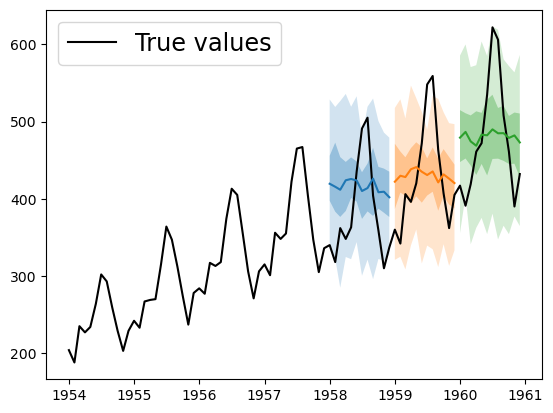

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
np.bool = np.bool_

import mxnet as mx

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 1}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_10624\3720066626.py:46: RuntimeWarning: invalid value encountered in divide
  prod = series / series[0]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | Mode  | In sizes                                                        | Out sizes  
------------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 26.8 K | train | [[1, 1], [1, 1], [1, 1158, 6], [1, 1158], [1, 1158], [1, 6, 6]] | [1, 100, 6]
------------------------------------------------------------------------------------------------------------------------------
26.8 K    Trainable params
0         Non-trainabl

Epoch 0: |          | 40/? [00:02<00:00, 18.74it/s, v_num=62, train_loss=0.658]

Epoch 0, global step 40: 'train_loss' reached 0.65844 (best 0.65844), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=0-step=40.ckpt' as top 1


Epoch 1: |          | 40/? [00:02<00:00, 18.04it/s, v_num=62, train_loss=-1.17]

Epoch 1, global step 80: 'train_loss' reached -1.17308 (best -1.17308), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=1-step=80.ckpt' as top 1


Epoch 2: |          | 40/? [00:02<00:00, 17.45it/s, v_num=62, train_loss=-2.33]

Epoch 2, global step 120: 'train_loss' reached -2.32830 (best -2.32830), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=2-step=120.ckpt' as top 1


Epoch 3: |          | 40/? [00:02<00:00, 19.26it/s, v_num=62, train_loss=-2.84]

Epoch 3, global step 160: 'train_loss' reached -2.84165 (best -2.84165), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=3-step=160.ckpt' as top 1


Epoch 4: |          | 40/? [00:02<00:00, 17.18it/s, v_num=62, train_loss=-2.80]

Epoch 4, global step 200: 'train_loss' was not in top 1


Epoch 5: |          | 40/? [00:02<00:00, 17.80it/s, v_num=62, train_loss=-2.84]

Epoch 5, global step 240: 'train_loss' was not in top 1


Epoch 6: |          | 40/? [00:02<00:00, 19.85it/s, v_num=62, train_loss=-2.84]

Epoch 6, global step 280: 'train_loss' reached -2.84376 (best -2.84376), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=6-step=280.ckpt' as top 1


Epoch 7: |          | 40/? [00:02<00:00, 17.38it/s, v_num=62, train_loss=-3.26]

Epoch 7, global step 320: 'train_loss' reached -3.26132 (best -3.26132), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=7-step=320.ckpt' as top 1


Epoch 8: |          | 40/? [00:02<00:00, 17.36it/s, v_num=62, train_loss=-2.46]

Epoch 8, global step 360: 'train_loss' was not in top 1


Epoch 9: |          | 40/? [00:02<00:00, 17.38it/s, v_num=62, train_loss=-2.28]

Epoch 9, global step 400: 'train_loss' was not in top 1


Epoch 10: |          | 40/? [00:02<00:00, 14.42it/s, v_num=62, train_loss=-2.42]

Epoch 10, global step 440: 'train_loss' was not in top 1


Epoch 11: |          | 40/? [00:02<00:00, 14.97it/s, v_num=62, train_loss=-2.54]

Epoch 11, global step 480: 'train_loss' was not in top 1


Epoch 12: |          | 40/? [00:02<00:00, 15.49it/s, v_num=62, train_loss=-2.62]

Epoch 12, global step 520: 'train_loss' was not in top 1


Epoch 13: |          | 40/? [00:02<00:00, 14.68it/s, v_num=62, train_loss=-2.67]

Epoch 13, global step 560: 'train_loss' was not in top 1


Epoch 14: |          | 40/? [00:02<00:00, 13.44it/s, v_num=62, train_loss=-2.70]

Epoch 14, global step 600: 'train_loss' was not in top 1


Epoch 15: |          | 40/? [00:02<00:00, 13.75it/s, v_num=62, train_loss=-2.73]

Epoch 15, global step 640: 'train_loss' was not in top 1


Epoch 16: |          | 40/? [00:02<00:00, 14.93it/s, v_num=62, train_loss=-2.77]

Epoch 16, global step 680: 'train_loss' was not in top 1


Epoch 17: |          | 40/? [00:02<00:00, 16.70it/s, v_num=62, train_loss=-2.80]

Epoch 17, global step 720: 'train_loss' was not in top 1


Epoch 18: |          | 40/? [00:02<00:00, 17.72it/s, v_num=62, train_loss=-2.78]

Epoch 18, global step 760: 'train_loss' was not in top 1


Epoch 19: |          | 40/? [00:02<00:00, 18.70it/s, v_num=62, train_loss=-3.01]

Epoch 19, global step 800: 'train_loss' was not in top 1


Epoch 20: |          | 40/? [00:02<00:00, 17.98it/s, v_num=62, train_loss=-3.39]

Epoch 20, global step 840: 'train_loss' reached -3.39179 (best -3.39179), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=20-step=840.ckpt' as top 1


Epoch 21: |          | 40/? [00:02<00:00, 15.05it/s, v_num=62, train_loss=-3.42]

Epoch 21, global step 880: 'train_loss' reached -3.42049 (best -3.42049), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=21-step=880.ckpt' as top 1


Epoch 22: |          | 40/? [00:02<00:00, 14.94it/s, v_num=62, train_loss=-3.65]

Epoch 22, global step 920: 'train_loss' reached -3.65286 (best -3.65286), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=22-step=920.ckpt' as top 1


Epoch 23: |          | 40/? [00:02<00:00, 14.64it/s, v_num=62, train_loss=-3.70]

Epoch 23, global step 960: 'train_loss' reached -3.70309 (best -3.70309), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=23-step=960.ckpt' as top 1


Epoch 24: |          | 40/? [00:02<00:00, 15.76it/s, v_num=62, train_loss=-3.31]

Epoch 24, global step 1000: 'train_loss' was not in top 1


Epoch 25: |          | 40/? [00:02<00:00, 15.17it/s, v_num=62, train_loss=-3.50]

Epoch 25, global step 1040: 'train_loss' was not in top 1


Epoch 26: |          | 40/? [00:02<00:00, 14.67it/s, v_num=62, train_loss=-3.80]

Epoch 26, global step 1080: 'train_loss' reached -3.79912 (best -3.79912), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=26-step=1080.ckpt' as top 1


Epoch 27: |          | 40/? [00:03<00:00, 12.45it/s, v_num=62, train_loss=-3.17]

Epoch 27, global step 1120: 'train_loss' was not in top 1


Epoch 28: |          | 40/? [00:02<00:00, 15.80it/s, v_num=62, train_loss=-3.51]

Epoch 28, global step 1160: 'train_loss' was not in top 1


Epoch 29: |          | 40/? [00:02<00:00, 13.97it/s, v_num=62, train_loss=-3.61]

Epoch 29, global step 1200: 'train_loss' was not in top 1


Epoch 30: |          | 40/? [00:02<00:00, 13.92it/s, v_num=62, train_loss=-3.33]

Epoch 30, global step 1240: 'train_loss' was not in top 1


Epoch 31: |          | 40/? [00:02<00:00, 15.54it/s, v_num=62, train_loss=-3.49]

Epoch 31, global step 1280: 'train_loss' was not in top 1


Epoch 32: |          | 40/? [00:02<00:00, 14.82it/s, v_num=62, train_loss=-3.59]

Epoch 32, global step 1320: 'train_loss' was not in top 1


Epoch 33: |          | 40/? [00:02<00:00, 14.63it/s, v_num=62, train_loss=-3.40]

Epoch 33, global step 1360: 'train_loss' was not in top 1


Epoch 34: |          | 40/? [00:02<00:00, 15.63it/s, v_num=62, train_loss=-3.22]

Epoch 34, global step 1400: 'train_loss' was not in top 1


Epoch 35: |          | 40/? [00:02<00:00, 17.24it/s, v_num=62, train_loss=-3.16]

Epoch 35, global step 1440: 'train_loss' was not in top 1


Epoch 36: |          | 40/? [00:02<00:00, 18.86it/s, v_num=62, train_loss=-3.36]

Epoch 36, global step 1480: 'train_loss' was not in top 1


Epoch 37: |          | 40/? [00:02<00:00, 17.84it/s, v_num=62, train_loss=-3.45]

Epoch 37, global step 1520: 'train_loss' was not in top 1


Epoch 38: |          | 40/? [00:02<00:00, 17.04it/s, v_num=62, train_loss=-3.71]

Epoch 38, global step 1560: 'train_loss' was not in top 1


Epoch 39: |          | 40/? [00:02<00:00, 18.46it/s, v_num=62, train_loss=-3.80]

Epoch 39, global step 1600: 'train_loss' was not in top 1


Epoch 40: |          | 40/? [00:02<00:00, 19.11it/s, v_num=62, train_loss=-3.81]

Epoch 40, global step 1640: 'train_loss' reached -3.81103 (best -3.81103), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=40-step=1640.ckpt' as top 1


Epoch 41: |          | 40/? [00:02<00:00, 14.90it/s, v_num=62, train_loss=-3.78]

Epoch 41, global step 1680: 'train_loss' was not in top 1


Epoch 42: |          | 40/? [00:02<00:00, 14.49it/s, v_num=62, train_loss=-3.82]

Epoch 42, global step 1720: 'train_loss' reached -3.82482 (best -3.82482), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=42-step=1720.ckpt' as top 1


Epoch 43: |          | 40/? [00:02<00:00, 14.62it/s, v_num=62, train_loss=-3.78]

Epoch 43, global step 1760: 'train_loss' was not in top 1


Epoch 44: |          | 40/? [00:02<00:00, 15.61it/s, v_num=62, train_loss=-3.81]

Epoch 44, global step 1800: 'train_loss' was not in top 1


Epoch 45: |          | 40/? [00:02<00:00, 14.30it/s, v_num=62, train_loss=-3.78]

Epoch 45, global step 1840: 'train_loss' was not in top 1


Epoch 46: |          | 40/? [00:02<00:00, 15.10it/s, v_num=62, train_loss=-3.83]

Epoch 46, global step 1880: 'train_loss' reached -3.82998 (best -3.82998), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=46-step=1880.ckpt' as top 1


Epoch 47: |          | 40/? [00:02<00:00, 14.59it/s, v_num=62, train_loss=-3.86]

Epoch 47, global step 1920: 'train_loss' reached -3.86210 (best -3.86210), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=47-step=1920.ckpt' as top 1


Epoch 48: |          | 40/? [00:02<00:00, 14.61it/s, v_num=62, train_loss=-3.54]

Epoch 48, global step 1960: 'train_loss' was not in top 1


Epoch 49: |          | 40/? [00:02<00:00, 14.48it/s, v_num=62, train_loss=-3.85]

Epoch 49, global step 2000: 'train_loss' was not in top 1


Epoch 50: |          | 40/? [00:02<00:00, 15.07it/s, v_num=62, train_loss=-3.87]

Epoch 50, global step 2040: 'train_loss' reached -3.87345 (best -3.87345), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=50-step=2040.ckpt' as top 1


Epoch 51: |          | 40/? [00:02<00:00, 14.59it/s, v_num=62, train_loss=-3.83]

Epoch 51, global step 2080: 'train_loss' was not in top 1


Epoch 52: |          | 40/? [00:02<00:00, 14.63it/s, v_num=62, train_loss=-3.77]

Epoch 52, global step 2120: 'train_loss' was not in top 1


Epoch 53: |          | 40/? [00:02<00:00, 14.20it/s, v_num=62, train_loss=-3.71]

Epoch 53, global step 2160: 'train_loss' was not in top 1


Epoch 54: |          | 40/? [00:02<00:00, 15.03it/s, v_num=62, train_loss=-3.86]

Epoch 54, global step 2200: 'train_loss' was not in top 1


Epoch 55: |          | 40/? [00:02<00:00, 14.93it/s, v_num=62, train_loss=-3.80]

Epoch 55, global step 2240: 'train_loss' was not in top 1


Epoch 56: |          | 40/? [00:02<00:00, 18.40it/s, v_num=62, train_loss=-3.76]

Epoch 56, global step 2280: 'train_loss' was not in top 1


Epoch 57: |          | 40/? [00:02<00:00, 17.37it/s, v_num=62, train_loss=-3.57]

Epoch 57, global step 2320: 'train_loss' was not in top 1


Epoch 58: |          | 40/? [00:02<00:00, 16.81it/s, v_num=62, train_loss=-3.84]

Epoch 58, global step 2360: 'train_loss' was not in top 1


Epoch 59: |          | 40/? [00:02<00:00, 18.60it/s, v_num=62, train_loss=-3.93]

Epoch 59, global step 2400: 'train_loss' reached -3.93163 (best -3.93163), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=59-step=2400.ckpt' as top 1


Epoch 60: |          | 40/? [00:02<00:00, 14.97it/s, v_num=62, train_loss=-3.92]

Epoch 60, global step 2440: 'train_loss' was not in top 1


Epoch 61: |          | 40/? [00:02<00:00, 14.55it/s, v_num=62, train_loss=-3.87]

Epoch 61, global step 2480: 'train_loss' was not in top 1


Epoch 62: |          | 40/? [00:02<00:00, 15.40it/s, v_num=62, train_loss=-3.82]

Epoch 62, global step 2520: 'train_loss' was not in top 1


Epoch 63: |          | 40/? [00:02<00:00, 18.44it/s, v_num=62, train_loss=-3.87]

Epoch 63, global step 2560: 'train_loss' was not in top 1


Epoch 64: |          | 40/? [00:02<00:00, 17.14it/s, v_num=62, train_loss=-3.84]

Epoch 64, global step 2600: 'train_loss' was not in top 1


Epoch 65: |          | 40/? [00:02<00:00, 18.61it/s, v_num=62, train_loss=-3.83]

Epoch 65, global step 2640: 'train_loss' was not in top 1


Epoch 66: |          | 40/? [00:02<00:00, 16.03it/s, v_num=62, train_loss=-3.88]

Epoch 66, global step 2680: 'train_loss' was not in top 1


Epoch 67: |          | 40/? [00:02<00:00, 18.76it/s, v_num=62, train_loss=-3.83]

Epoch 67, global step 2720: 'train_loss' was not in top 1


Epoch 68: |          | 40/? [00:02<00:00, 17.85it/s, v_num=62, train_loss=-3.82]

Epoch 68, global step 2760: 'train_loss' was not in top 1


Epoch 69: |          | 40/? [00:02<00:00, 17.67it/s, v_num=62, train_loss=-3.83]

Epoch 69, global step 2800: 'train_loss' was not in top 1


Epoch 70: |          | 40/? [00:02<00:00, 18.78it/s, v_num=62, train_loss=-3.89]

Epoch 70, global step 2840: 'train_loss' was not in top 1


Epoch 71: |          | 40/? [00:02<00:00, 15.92it/s, v_num=62, train_loss=-4.05]

Epoch 71, global step 2880: 'train_loss' reached -4.05016 (best -4.05016), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=71-step=2880.ckpt' as top 1


Epoch 72: |          | 40/? [00:03<00:00, 11.28it/s, v_num=62, train_loss=-3.96]

Epoch 72, global step 2920: 'train_loss' was not in top 1


Epoch 73: |          | 40/? [00:02<00:00, 14.88it/s, v_num=62, train_loss=-3.92]

Epoch 73, global step 2960: 'train_loss' was not in top 1


Epoch 74: |          | 40/? [00:02<00:00, 14.28it/s, v_num=62, train_loss=-3.90]

Epoch 74, global step 3000: 'train_loss' was not in top 1


Epoch 75: |          | 40/? [00:02<00:00, 17.16it/s, v_num=62, train_loss=-3.98]

Epoch 75, global step 3040: 'train_loss' was not in top 1


Epoch 76: |          | 40/? [00:02<00:00, 17.91it/s, v_num=62, train_loss=-3.97]

Epoch 76, global step 3080: 'train_loss' was not in top 1


Epoch 77: |          | 40/? [00:02<00:00, 17.46it/s, v_num=62, train_loss=-3.89]

Epoch 77, global step 3120: 'train_loss' was not in top 1


Epoch 78: |          | 40/? [00:02<00:00, 18.52it/s, v_num=62, train_loss=-3.99]

Epoch 78, global step 3160: 'train_loss' was not in top 1


Epoch 79: |          | 40/? [00:02<00:00, 18.35it/s, v_num=62, train_loss=-3.95]

Epoch 79, global step 3200: 'train_loss' was not in top 1


Epoch 80: |          | 40/? [00:02<00:00, 17.57it/s, v_num=62, train_loss=-3.98]

Epoch 80, global step 3240: 'train_loss' was not in top 1


Epoch 81: |          | 40/? [00:02<00:00, 18.02it/s, v_num=62, train_loss=-3.97]

Epoch 81, global step 3280: 'train_loss' was not in top 1


Epoch 82: |          | 40/? [00:02<00:00, 17.92it/s, v_num=62, train_loss=-3.98]

Epoch 82, global step 3320: 'train_loss' was not in top 1


Epoch 83: |          | 40/? [00:02<00:00, 17.70it/s, v_num=62, train_loss=-3.99]

Epoch 83, global step 3360: 'train_loss' was not in top 1


Epoch 84: |          | 40/? [00:02<00:00, 18.40it/s, v_num=62, train_loss=-4.03]

Epoch 84, global step 3400: 'train_loss' was not in top 1


Epoch 85: |          | 40/? [00:02<00:00, 18.13it/s, v_num=62, train_loss=-3.98]

Epoch 85, global step 3440: 'train_loss' was not in top 1


Epoch 86: |          | 40/? [00:02<00:00, 17.77it/s, v_num=62, train_loss=-4.00]

Epoch 86, global step 3480: 'train_loss' was not in top 1


Epoch 87: |          | 40/? [00:02<00:00, 18.64it/s, v_num=62, train_loss=-4.05]

Epoch 87, global step 3520: 'train_loss' was not in top 1


Epoch 88: |          | 40/? [00:02<00:00, 18.13it/s, v_num=62, train_loss=-4.04]

Epoch 88, global step 3560: 'train_loss' was not in top 1


Epoch 89: |          | 40/? [00:02<00:00, 17.23it/s, v_num=62, train_loss=-3.96]

Epoch 89, global step 3600: 'train_loss' was not in top 1


Epoch 90: |          | 40/? [00:02<00:00, 18.86it/s, v_num=62, train_loss=-4.05]

Epoch 90, global step 3640: 'train_loss' was not in top 1


Epoch 91: |          | 40/? [00:02<00:00, 18.50it/s, v_num=62, train_loss=-4.00]

Epoch 91, global step 3680: 'train_loss' was not in top 1


Epoch 92: |          | 40/? [00:02<00:00, 18.94it/s, v_num=62, train_loss=-3.93]

Epoch 92, global step 3720: 'train_loss' was not in top 1


Epoch 93: |          | 40/? [00:02<00:00, 17.98it/s, v_num=62, train_loss=-3.92]

Epoch 93, global step 3760: 'train_loss' was not in top 1


Epoch 94: |          | 40/? [00:02<00:00, 19.06it/s, v_num=62, train_loss=-4.06]

Epoch 94, global step 3800: 'train_loss' reached -4.05621 (best -4.05621), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=94-step=3800.ckpt' as top 1


Epoch 95: |          | 40/? [00:02<00:00, 14.96it/s, v_num=62, train_loss=-4.05]

Epoch 95, global step 3840: 'train_loss' was not in top 1


Epoch 96: |          | 40/? [00:02<00:00, 14.45it/s, v_num=62, train_loss=-4.04]

Epoch 96, global step 3880: 'train_loss' was not in top 1


Epoch 97: |          | 40/? [00:02<00:00, 15.66it/s, v_num=62, train_loss=-4.11]

Epoch 97, global step 3920: 'train_loss' reached -4.10711 (best -4.10711), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_62\\checkpoints\\epoch=97-step=3920.ckpt' as top 1


Epoch 98: |          | 40/? [00:02<00:00, 14.96it/s, v_num=62, train_loss=-4.08]

Epoch 98, global step 3960: 'train_loss' was not in top 1


Epoch 99: |          | 40/? [00:02<00:00, 14.21it/s, v_num=62, train_loss=-4.10]

Epoch 99, global step 4000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: |          | 40/? [00:02<00:00, 14.19it/s, v_num=62, train_loss=-4.10]


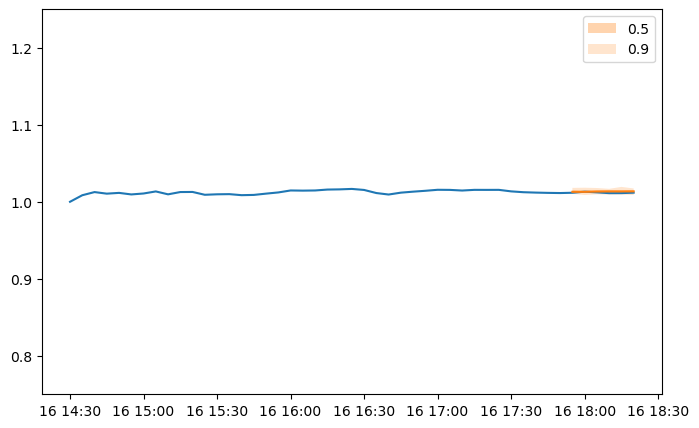

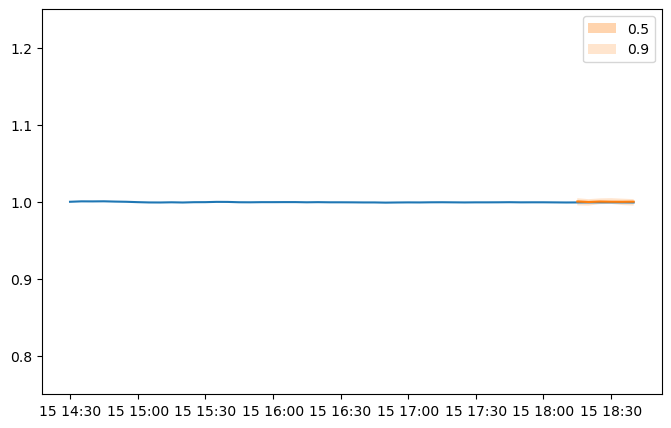

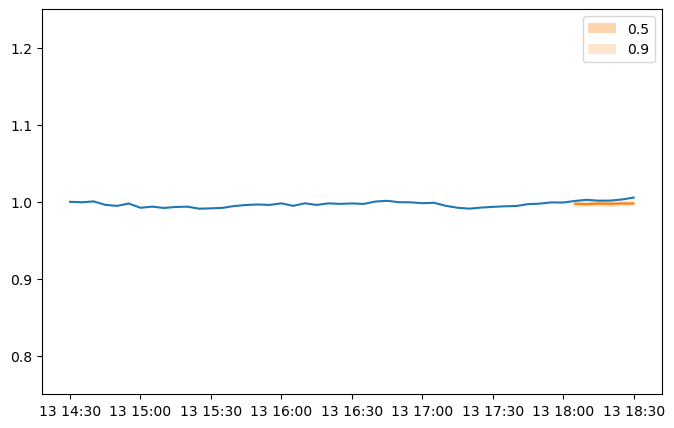

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
np.bool = np.bool_
import mxnet as mx

from gluonts.torch import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.mx import Trainer
from gluonts.evaluation import make_evaluation_predictions
import random

# Load JSONL file
jsonl_file = "deepar_train_data.jsonl"

data = []
with open(jsonl_file, "r") as f:
    for line in f:
        data.append(json.loads(line))

random.shuffle(data)

split_idx = int(0.8 * len(data))

# Train and test sets
train_data = data[:split_idx]
test_data = data[split_idx:]

def normalize_relative(series):
    """
    Normalize a time series to start at 1 and represent changes as multiples of the initial value.
    
    Args:
        series: The original time series.
    
    Returns:
        Normalized series starting at 1.
    """

    series = np.array(series)
    if type(series[0]) == "numpy.ndarray":
        return [series[0] / series[0][0]]
    else:
        prod = series / series[0]
        return prod

# Convert to ListDataset format
train_dataset = ListDataset(
    [{
        "target": normalize_relative(entry["target"]), 
        "start": pd.Timestamp(entry["start"]), 
        "dynamic_feat": normalize_relative(entry["dynamic_feat"])
        } for entry in train_data],
    freq="5min"
)

# Convert to ListDataset format
test_dataset = ListDataset(
    [{
        "target": normalize_relative(entry["target"]), 
        "start": pd.Timestamp(entry["start"]), 
        "dynamic_feat": normalize_relative(entry["dynamic_feat"])
        } for entry in test_data],
    freq="5min"
)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=6, freq="5min", num_batches_per_epoch = 40, trainer_kwargs={"max_epochs": 100}
).train(train_dataset)

forecast_it, ts_it = make_evaluation_predictions(
    dataset=train_dataset,  # test dataset
    predictor=model,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

for i in range(3):
    plt.figure(figsize=(8, 5)) 
    plt.plot(tss[i].to_timestamp())
    forecast_entry = forecasts[i]
    forecast_entry.plot(show_label=True)
    plt.legend()


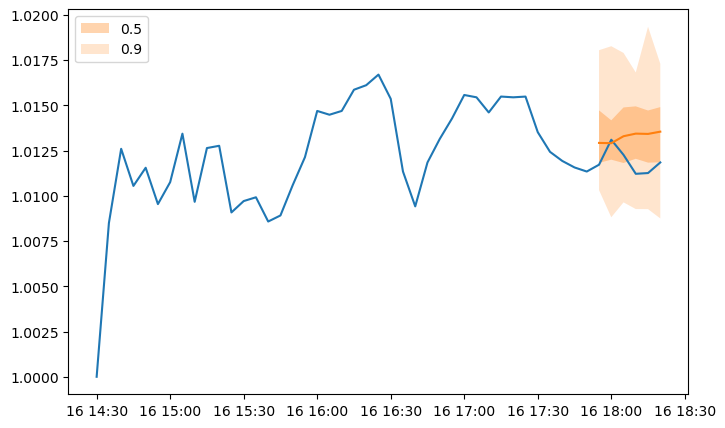

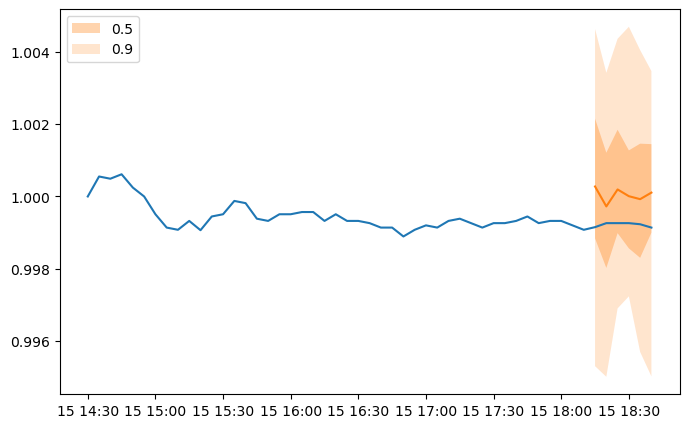

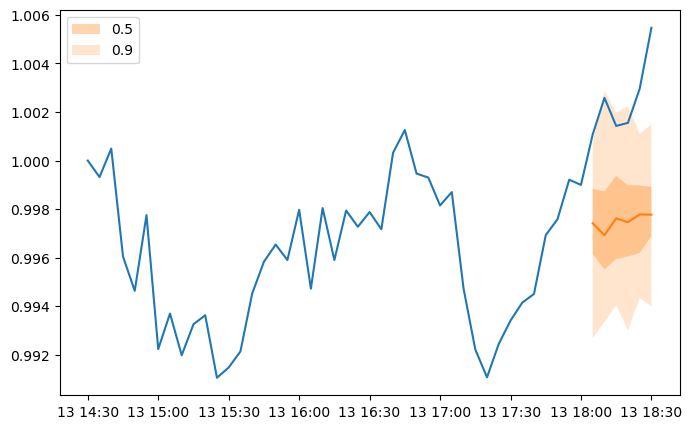

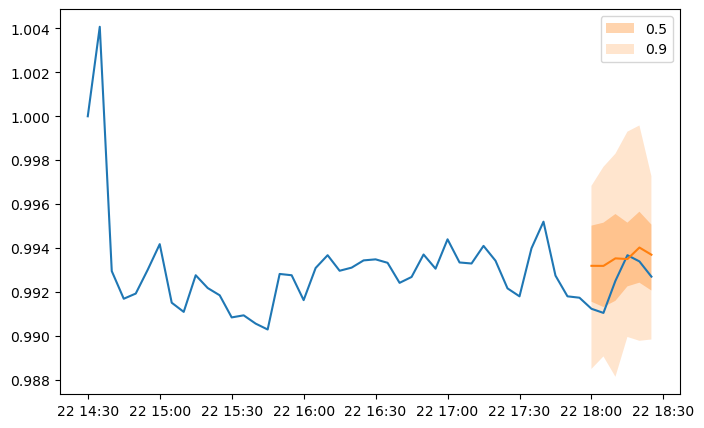

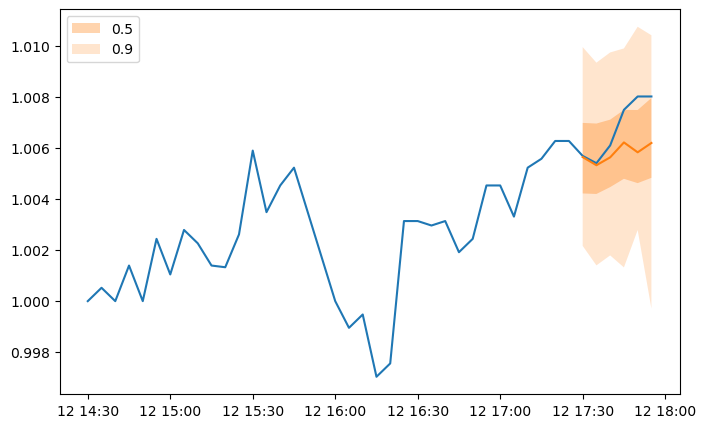

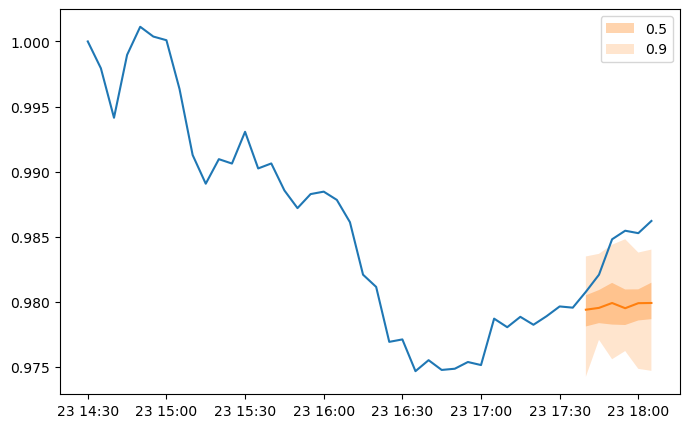

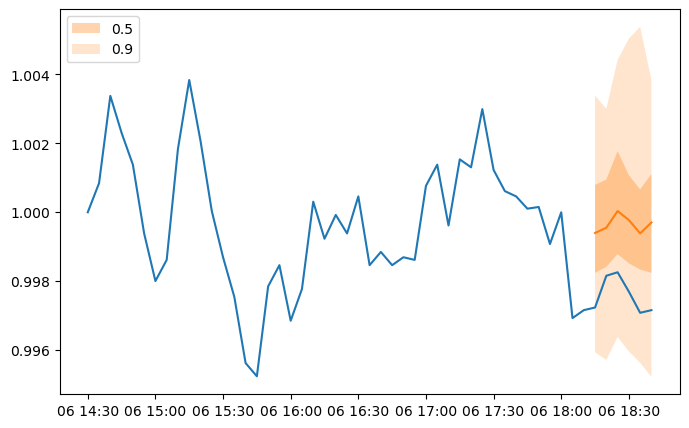

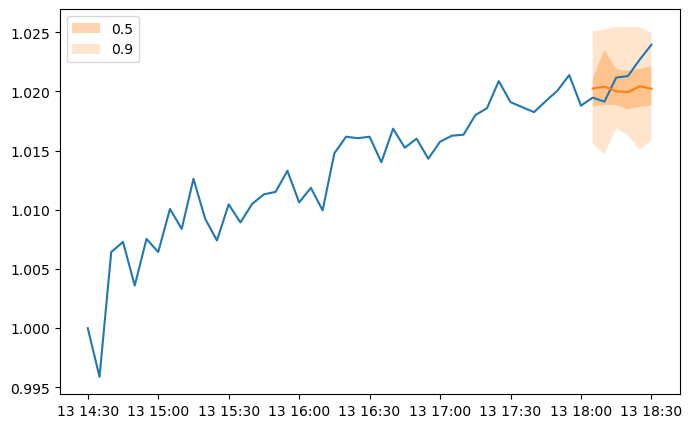

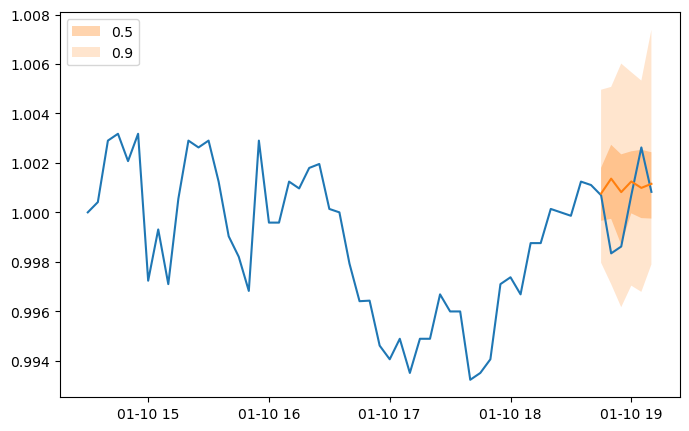

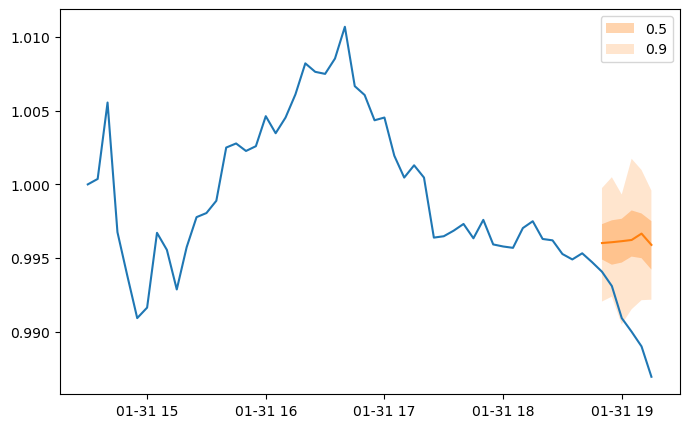

In [83]:

for i in range(10):
    plt.figure(figsize=(8, 5)) 
    plt.plot(tss[i].to_timestamp())
    forecast_entry = forecasts[i]
    forecast_entry.plot(show_label=True)
    plt.legend()

In [47]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
np.bool = np.bool_

import mxnet as mx

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.mx import Trainer
from gluonts.evaluation import make_evaluation_predictions

# Load JSONL file
jsonl_file = "deepar_train_data.jsonl"

data = []
with open(jsonl_file, "r") as f:
    for line in f:
        data.append(json.loads(line))

# Convert to ListDataset format
train_dataset = ListDataset(
    [{"target": entry["target"], "start": pd.Timestamp(entry["start"])} for entry in data],
    freq="5min"
)
print(len(train_dataset))

1181


In [44]:
forecasts_array = np.array(list(forecasts))
forecasts_array
# Generate x-axis values if timestamps are unavailable
# x_values = range(len(forecasts_array))
# x_values
# plt.figure(figsize=(10, 5))
# plt.plot(x_values, forecasts_array, label="Predicted Values", linestyle="dashed", color="red")
# plt.xlabel("Time Step")
# plt.ylabel("Forecasted Value")
# plt.title("Model Forecasts")
# plt.legend()
# plt.show()

array([], dtype=float64)

In [30]:
data = []
with open(jsonl_file, "r") as f:
    for line in f:
        data.append(json.loads(line))
toset = [type(pd.Timestamp(i["start"])) for i in data]

print(set(toset))

{<class 'pandas._libs.tslibs.timestamps.Timestamp'>}


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np # Requiers Version: 1.23.5
np.bool = np.bool_
import mxnet as mx

from gluonts.torch import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.mx import Trainer
from gluonts.evaluation import make_evaluation_predictions
import random

# Load JSONL file
jsonl_file = "deepar_train_data.jsonl"

train_data = []
with open(jsonl_file, "r") as f:
    for line in f:
        train_data.append(json.loads(line))

# Load JSONL file
jsonl_file = "deepar_test_data.jsonl"

test_data = []
with open(jsonl_file, "r") as f:
    for line in f:
        test_data.append(json.loads(line))

def normalize_relative(series):
    """
    Normalize a time series to start at 1 and represent changes as multiples of the initial value.
    
    Args:
        series: The original time series.
    
    Returns:
        Normalized series starting at 1.
    """

    series = np.array(series)
    if type(series[0]) == "numpy.ndarray":
        return [series[0] / series[0][0]]
    else:
        prod = series / series[0]
        return prod

# Convert to ListDataset format
train_dataset = ListDataset(
    [{
        "target": normalize_relative(entry["target"]), 
        "start": pd.Timestamp(entry["start"]), 
        "dynamic_feat": normalize_relative(entry["dynamic_feat"]),
        "item_id": entry["item_id"]
        } for entry in train_data],
    freq="5min"
)

# Convert to ListDataset format
test_dataset = ListDataset(
    [{
        "target": normalize_relative(entry["target"]), 
        "start": pd.Timestamp(entry["start"]), 
        "dynamic_feat": normalize_relative(entry["dynamic_feat"]),
        "item_id": entry["item_id"]
        } for entry in test_data],
    freq="5min"
)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=6, 
    freq="5min", 
    num_batches_per_epoch = 40, 
    trainer_kwargs={"max_epochs": 1}
).train(train_dataset)

# save the trained model in tmp/
from pathlib import Path

model.serialize(Path(""))

# forecast_it, ts_it = make_evaluation_predictions(
#     dataset=train_dataset,  # test dataset
#     predictor=model,  # predictor
#     num_samples=100,  # number of sample paths we want for evaluation
# )
# forecasts = list(forecast_it)
# tss = list(ts_it)

# for i in range(10):
#     plt.figure(figsize=(8, 5)) 
#     plt.plot(tss[i].to_timestamp())
#     forecast_entry = forecasts[i]
#     forecast_entry.plot(show_label=True)
#     plt.legend()


C:\Users\olive\AppData\Local\Temp\ipykernel_22204\3850907911.py:46: RuntimeWarning: invalid value encountered in divide
  prod = series / series[0]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\olive\anaconda3\envs\algo_env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | Mode  | In sizes                                                        | Out sizes  
------------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 26.8 K | train | [[1, 1], [1, 1], [1, 1158, 6], [1, 1158], [1, 1158], [1, 6, 6]] | [1, 100, 6]
------------------------------------------------------------------------------------------------------------------------------
26.8 K    Trainable params
0         Non-trainabl

Epoch 0: |          | 40/? [00:02<00:00, 15.61it/s, v_num=66, train_loss=0.966]

Epoch 0, global step 40: 'train_loss' reached 0.96557 (best 0.96557), saving model to 'c:\\Users\\olive\\OneDrive\\Documents\\GitHub\\algo_trading\\lightning_logs\\version_66\\checkpoints\\epoch=0-step=40.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: |          | 40/? [00:02<00:00, 15.48it/s, v_num=66, train_loss=0.966]


FileNotFoundError: [Errno 2] No such file or directory: '\\tmp\\gluonts-config.json'

In [6]:
from pathlib import Path

model.serialize(Path(""))

Average movment of stocks 0.005935528354999781
Average profit for strat strat1: -0.00018928050994873046
Average profit for strat strat2: -1.0562463871483664e-05
Average profit for strat strat3: 0.0006421983242034912
Average profit for strat strat4: -0.0012165307998657227
Average profit for strat strat5: 0.008521795272827148
a
Average profit for strat top_10: 0.006790810823440551


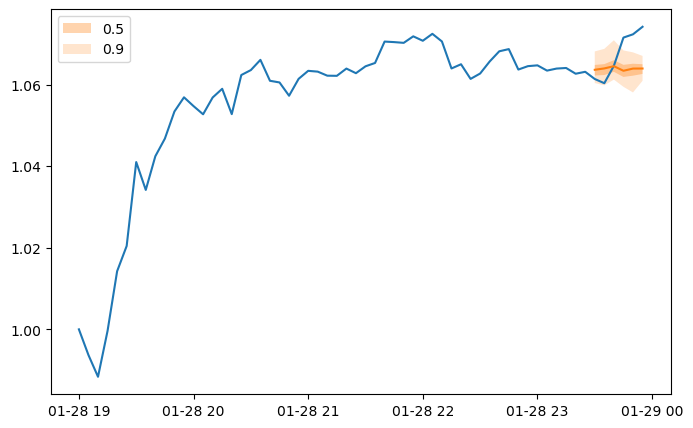

In [ ]:
# To make predictions on future datasets, I will have to manually add 6 time unitis to the array.
# Then the evaluation function will cut of this last bit and make predictions on it.

import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np # Requiers Version: 1.23.5
np.bool = np.bool_
import mxnet as mx

from gluonts.dataset.common import ListDataset
from gluonts.evaluation import make_evaluation_predictions
from gluonts.model.predictor import Predictor
from pathlib import Path
import heapq

def normalize_relative(series, dynamic = False):
    """
    Normalize a time series to start at 1 and represent changes as multiples of the initial value.
    
    Args:
        series: The original time series.
    
    Returns:
        Normalized series starting at 1.
    """

    series = np.array(series)
    if dynamic:
        if series[0][0] == 0:
            return [series[0] / series[0][1]]
        return [series[0] / series[0][0]]
    else:
        prod = series / series[0]
        return prod

# Load JSONL file
jsonl_file = "deepar_test_data.jsonl"

test_data = []
with open(jsonl_file, "r") as f:
    for line in f:
        test_data.append(json.loads(line))

# Convert to ListDataset format
test_dataset = ListDataset(
    [{
        "target": normalize_relative(entry["target"]), 
        "start": pd.Timestamp(entry["start"]), 
        "dynamic_feat": normalize_relative(entry["dynamic_feat"], dynamic = True),
        "item_id": entry["item_id"]
        } for entry in test_data],
    freq="5min"
)

# loads it back
predictor_deserialized = Predictor.deserialize(Path(""))

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_dataset,  # test dataset
    predictor=predictor_deserialized,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

def plot_forecast(true_vals, predictions):
    plt.figure(figsize=(8, 5)) 
    plt.plot(true_vals.to_timestamp())
    forecast_entry = predictions
    forecast_entry.plot(show_label=True)
    plt.legend()

acc_diff_list = []
strat1 = []
strat2 = []
strat3 = []
strat4 = []
strat5 = []
strat6 = []
strat7 = []

strat_top_3 = []
strat_top_5 = []
strat_top_10 = []

def add_to_top_x_strat(strat, x):
    heapq.heapify(strat)
    if len(strat)<x:
        strat.append(acc_diff)
    elif median_dif>strat[0]:
        heapq.heapreplace(strat, median_dif)

max_i, max_i_val = -1, 0
for i in range(len(test_dataset)):
    last_val = tss[i].iloc[-7][0]
    lower_quantile_prediction = forecasts[i].quantile(0.25)[-1]
    median = forecasts[i].quantile(0.5)[-1]
    upper_quantile_prediction = forecasts[i].quantile(0.75)[-1]
    true_value = tss[i].iloc[-1][0]
    upper_dif = upper_quantile_prediction-last_val
    lower_dif = lower_quantile_prediction-last_val
    median_dif = median-last_val
    acc_diff = ((true_value-last_val)/last_val)*100

    acc_diff_list.append(acc_diff)

    add_to_top_x_strat(strat_top_3, 3)
    add_to_top_x_strat(strat_top_5, 5)
    add_to_top_x_strat(strat_top_10, 10)

    if median>max_i_val:
        max_i, max_i_val = i, median

    # strat1
    if lower_dif>=0:
        strat1.append(acc_diff)

    # strat2
    if upper_dif > -2*lower_dif or lower_dif>=0:
        strat2.append(acc_diff)
    
    # strat3
    if median_dif>0.005:
        strat3.append(acc_diff)
    
    # strat4
    if median_dif>0.0075:
        strat4.append(acc_diff)
    
    # strat5
    if median_dif>0.01:
        strat5.append(acc_diff)
    
    # strat6
    if median_dif>0.0125:
        strat6.append(acc_diff)
        
    # strat7
    if median_dif>0.015:
        strat7.append(acc_diff)

print(f"Average movment of stocks {sum(acc_diff_list)/len(acc_diff_list)*100}")

def find_prof(strat):
    strat_name = [name for name, val in globals().items() if val is strat]
    if len(strat) > 0:
        print(f"Average profit for strat {strat_name[0] if strat_name else 'unknown'}: {sum(strat)/len(strat)}")

find_prof(strat1)
find_prof(strat2)
find_prof(strat3)
find_prof(strat4)
find_prof(strat5)
find_prof(strat6)
find_prof(strat7)
find_prof(strat_top_3)
find_prof(strat_top_5)
find_prof(strat_top_10)

In [35]:
import heapq

# Example top_10 list (must be a min-heap)
top_10 = [30, 5, 8, 10, 12, 15, 18, 20, 25, 30]
heapq.heapify(top_10)  # Ensure it's a heap

x = 22  # New number

# Replace the smallest number if x is larger
if x > top_10[0]:  
    heapq.heapreplace(top_10, x)  # Removes smallest and inserts x

print(top_10)  # Updated top_10 list


[8, 10, 15, 20, 12, 22, 18, 30, 25, 30]


In [25]:
upper_dif

0.0011960268

In [26]:
lower_dif

-0.0012162924

In [ ]:
# save the trained model in tmp/
from pathlib import Path

predictor.serialize(Path("/tmp/"))

# loads it back
from gluonts.model.predictor import Predictor

predictor_deserialized = Predictor.deserialize(Path("/tmp/"))